<div class="alert alert-info">
    <h1><strong>EQCI Day 4: </strong>Assignment</h1>
    <h2>Practice Creating Circuits</h2>
</div>

In [8]:
# Imports!
import numpy as np
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qxq.tools import checker
check = checker(globals())

print("Libraries imported successfully!")

Libraries imported successfully!


## Recreating Circuits 

In this exercise we will show an image of a circuit and have you try to recreate it in qiskit code!

In [5]:
class lchecker:
    def __init__(self,glob):
        self.glob = glob 
        
    def q1():
        # check if q1 exists 
        if 'q1' not in self.glob:
            print("Looks like q1 is not defined, make sure your answer is in the form `q1 = answer`!")
            return False
        else:
            student_solution
        def testq1():
            
                  
        print("Question 1 is correct!")
        return True
        
    def __call__(self):
        if not self.q1():
            print("Question 1 is incorrect!")
        return print("All questions look good!")
    
check = lchecker()

In [6]:
check()

AttributeError: 'lchecker' object has no attribute 'q1'

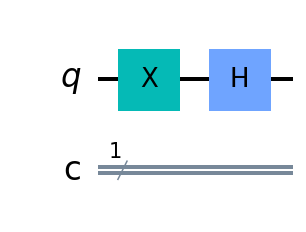

In [10]:
q1 = QuantumCircuit(1,1)
q1.x(0)
q1.h(0)
q1.draw("mpl", scale=2)

In [2]:
def q1():
    circ = QuantumCircuit()
    return circ

In [4]:
'q1' in globals().keys()

True

In [4]:
def new_thing():
    return "hello"

In [6]:
"new_thing" in check("")

True

True

In [11]:
lcs()

{}

### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*